### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [2]:
df=pd.read_csv(r"C:\Users\amaln\Downloads\US_E-commerce_records2020.csv",encoding='latin1')

## Data Description

In [3]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


In [5]:
df.shape

(3312, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

## EDA (Exploratory Data Analysis) 

In [7]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [8]:
numerical_columns

['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']

In [9]:
categorical_columns

['Order Date',
 'Order ID',
 'Ship Mode',
 'Customer ID',
 'Segment',
 'Country',
 'City',
 'State',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name']

In [10]:
df.isnull().sum() #checking for missing values

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
# Checking for duplicates 
df.duplicated().sum()

0

In [12]:
# converting the data type
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\amaln\AppData\Local\Temp\ipykernel_4424\3770528176.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


## Histplot Plotting

<Axes: xlabel='Sales', ylabel='Count'>

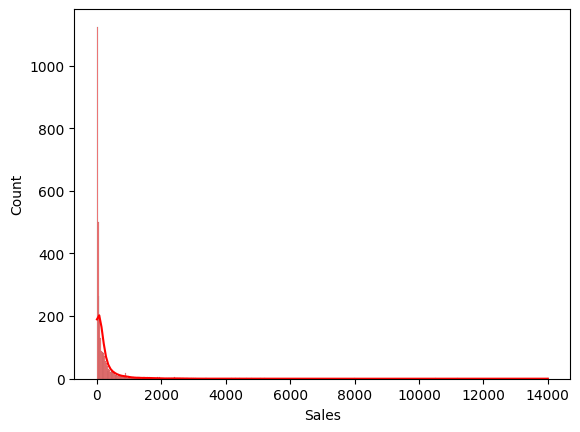

In [13]:
sns.histplot(df['Sales'], color='r',kde=True)

<Axes: xlabel='Discount', ylabel='Count'>

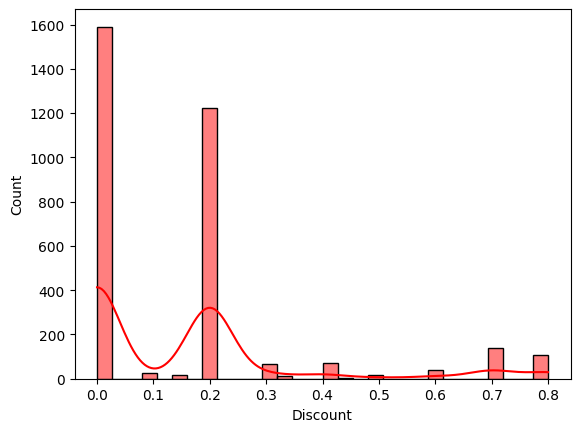

In [14]:
sns.histplot(df['Discount'], color='r',kde=True)

<Axes: xlabel='Quantity', ylabel='Count'>

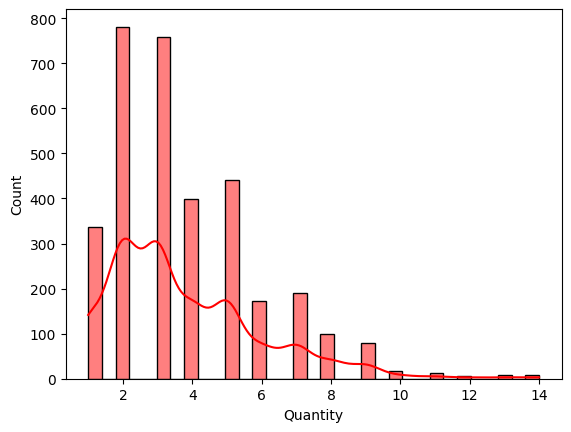

In [15]:
sns.histplot(df['Quantity'], color='r',kde=True)

<Axes: xlabel='Profit', ylabel='Count'>

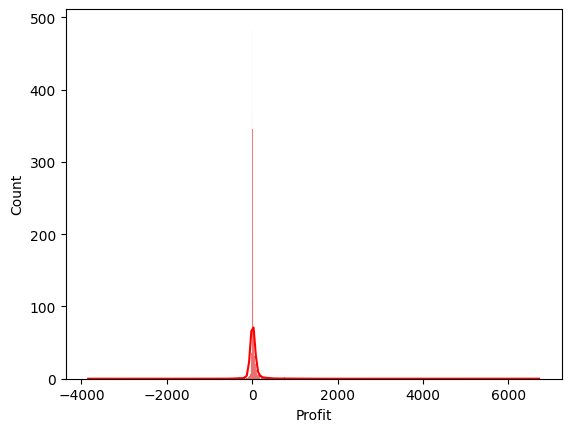

In [16]:
sns.histplot(df['Profit'], color='r',kde=True)

### Identifying Skewness:

In [17]:
from scipy.stats import skew,kurtosis

In [18]:
df['Sales'].skew()

10.554725731559309

In [19]:
df['Sales'].kurtosis()

179.30550292443198

In [20]:
df['Profit'].skew()

8.217176713685884

In [21]:
df['Quantity'].skew()

1.2239690759495512

In [22]:
df['Discount'].skew()

1.6998317021629943

##### Sales column shows the highest skewness

# Outlier Detection

## 1.IQR method :

In [23]:
def find_outliers(data, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [24]:
for column in df.select_dtypes(include=[np.number]).columns:
    outliers = find_outliers(df, column)
    print(f"{column} has {len(outliers)} outliers.")

Row ID has 0 outliers.
Postal Code has 0 outliers.
Sales has 366 outliers.
Quantity has 54 outliers.
Discount has 284 outliers.
Profit has 638 outliers.


## 2.Using BoxPlot

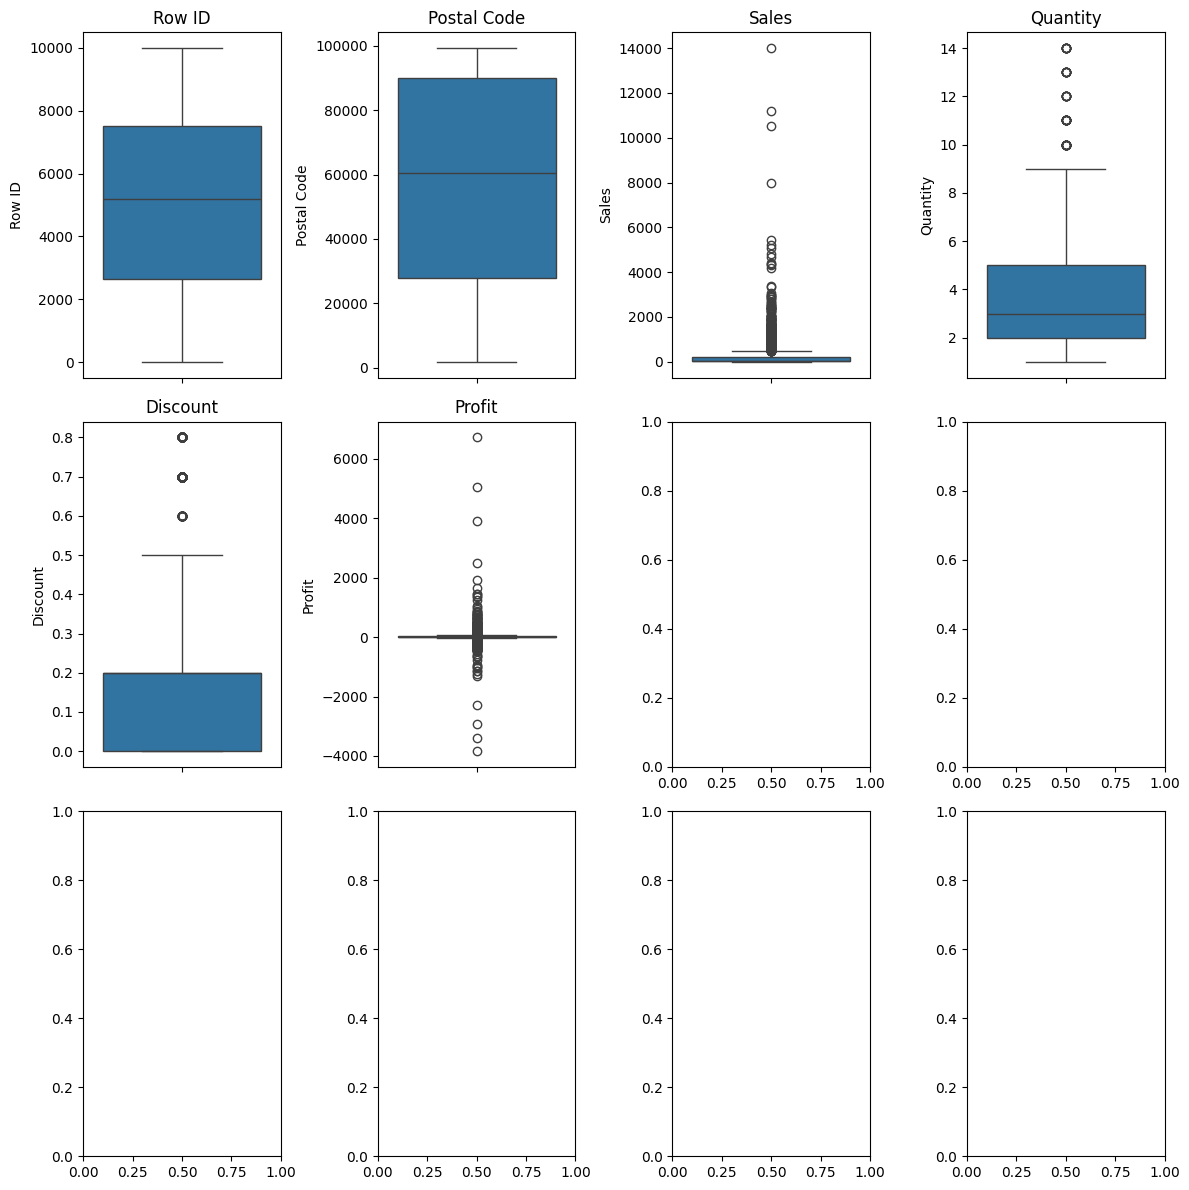

In [25]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## 3.Using mean and SD:

In [26]:
def find_outliers_using_mean(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [27]:
for column in df.select_dtypes(include=[np.number]).columns:
    outliers = find_outliers_using_mean(df, column)
    print(f"{column} has {len(outliers)} outliers.")

Row ID has 0 outliers.
Postal Code has 0 outliers.
Sales has 48 outliers.
Quantity has 36 outliers.
Discount has 107 outliers.
Profit has 36 outliers.


#### Outlier detection summary
##### There is presence of outliers in Sales, Quantity, Discount, and Profit 
##### These outliers represent legitimate business scenarios like bulk purchases, special discounts, or high-value transactions.
##### They represent valid business cases.So they should be kept in dataset.
##### Profit column consists of large number of negative values.Discount column consists values close to zero.
##### So,log transformation will be applicable only for Sales column

### Applying log transformation to Sales column(high skewness)

In [28]:
df['Sales_log']=np.log(df['Sales'])

In [29]:
df['Sales_log'].skew()

0.1891911954034789

## Visualization

### 1.Histplot after transformation

<Axes: xlabel='Sales_log', ylabel='Count'>

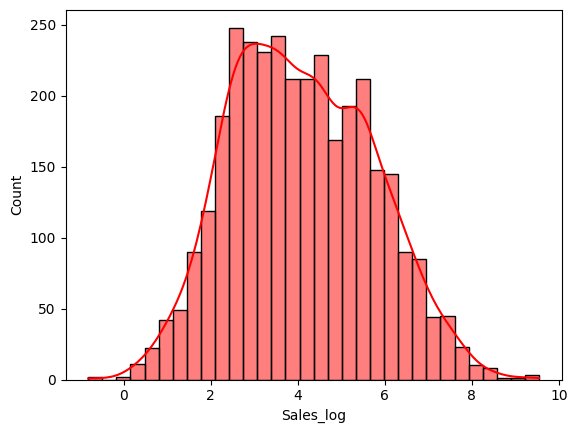

In [30]:
sns.histplot(df['Sales_log'],color='r',kde=True)

### 2.Pair Plot

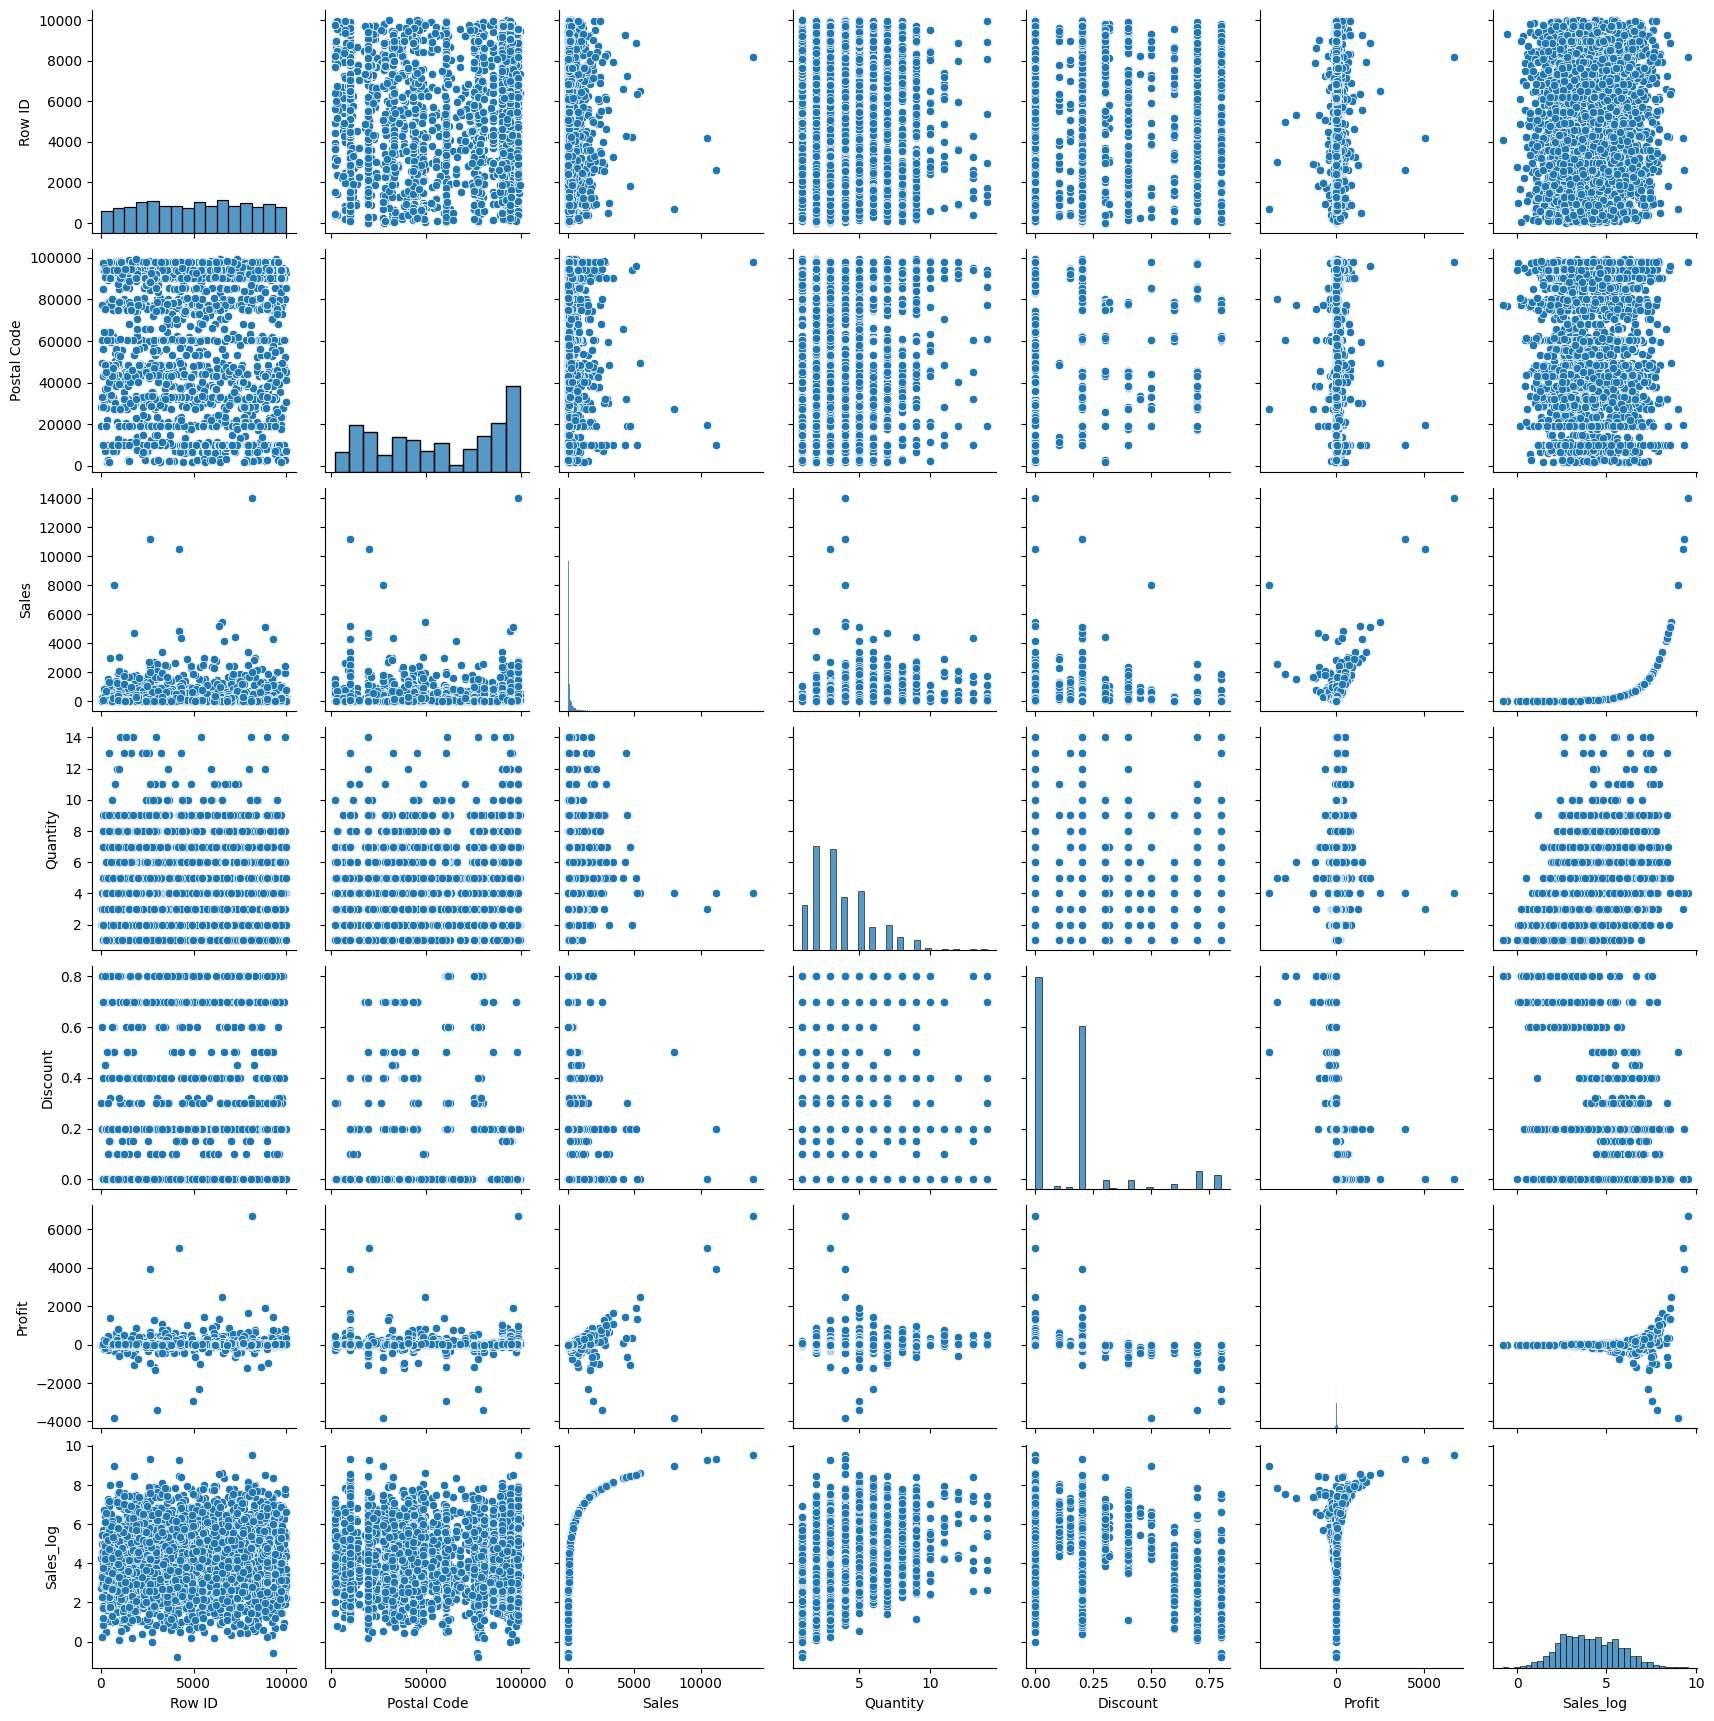

In [31]:
# Pair plot to see relationships between numerical variables
sns.pairplot(df)
plt.show()

### 3.Pie Chart

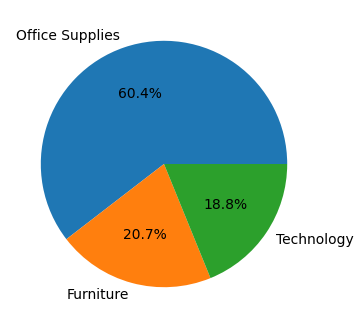

In [32]:
#pie chart for a categorical feature
categorical_feature = 'Category'
df[categorical_feature].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.ylabel('')
plt.show()

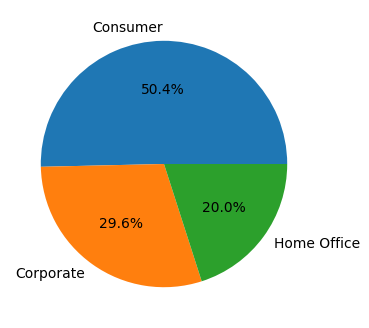

In [33]:
categorical_feature = 'Segment'
df[categorical_feature].value_counts().plot.pie(autopct='%1.1f%%', figsize=(4, 4))
plt.ylabel('')
plt.show()

### 4.Count Plot

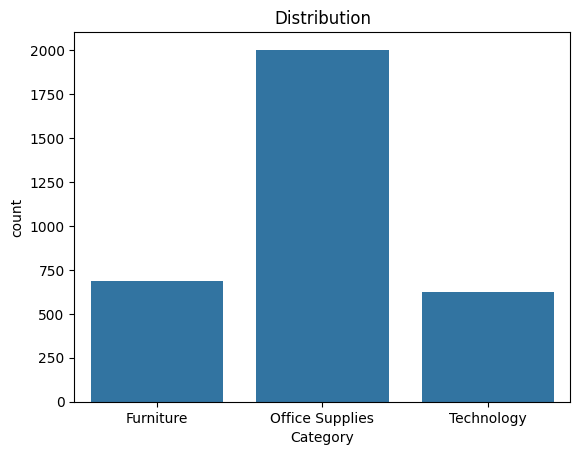

In [34]:
#Plot a count plot for a categorical feature
sns.countplot( x='Category',data=df)
plt.title('Distribution')
plt.show()

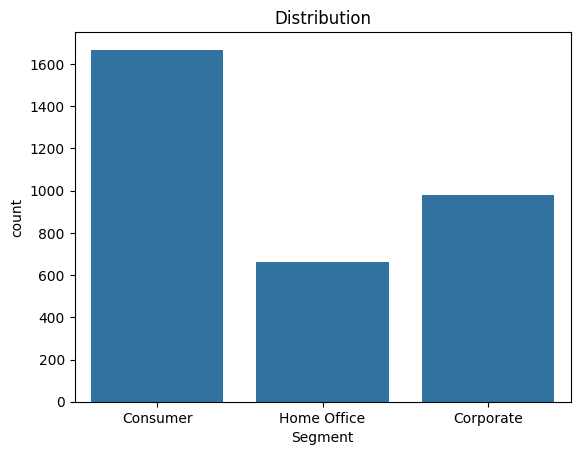

In [35]:
#Plot a count plot for a categorical feature
sns.countplot( x='Segment',data=df)
plt.title('Distribution')
plt.show()

### 5.Bar Chart

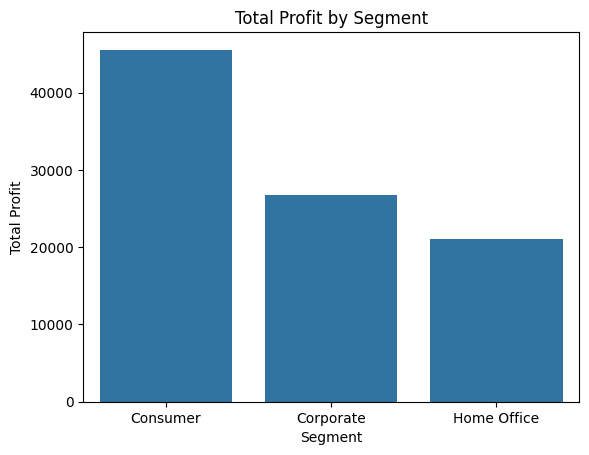

In [36]:
# Grouping data by 'Segment' and summing up the 'Profit'
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()

# Plotting the bar chart
sns.barplot(x='Segment', y='Profit', data=segment_profit)
plt.title('Total Profit by Segment')
plt.ylabel('Total Profit')
plt.xlabel('Segment')
plt.show()

### 6.Line Plot

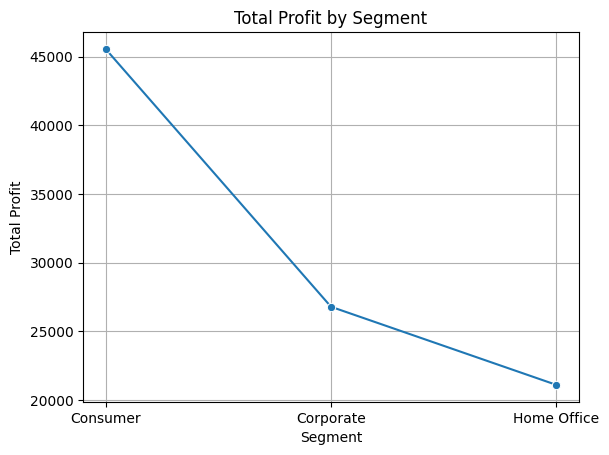

In [37]:
# Grouping data by 'Segment' and summing up the 'Profit'
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()

# Plotting the line plot
sns.lineplot(x='Segment', y='Profit', data=segment_profit, marker='o')
plt.title('Total Profit by Segment')
plt.ylabel('Total Profit')
plt.xlabel('Segment')
plt.grid(True)
plt.show()

### Removing unnecessary columns

In [38]:
# Drop columns that are not useful for prediction
df = df.drop(['Order Date', 'Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Product Name'], axis=1)

In [39]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales_log
0,Standard Class,Consumer,United States,Lorain,Ohio,44052,East,Furniture,Furnishings,48.896,4,0.2,8.5568,3.889696
1,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Furniture,Furnishings,474.430,11,0.0,199.2606,6.162114
2,First Class,Home Office,United States,Franklin,Wisconsin,53132,Central,Office Supplies,Binders,3.600,2,0.0,1.7280,1.280934
3,Standard Class,Consumer,United States,Huntsville,Texas,77340,Central,Office Supplies,Storage,454.560,5,0.2,-107.9580,6.119330
4,Standard Class,Consumer,United States,Huntsville,Texas,77340,Central,Furniture,Furnishings,141.420,5,0.6,-187.3815,4.951734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,Standard Class,Consumer,United States,New York City,New York,10009,East,Technology,Phones,90.930,7,0.0,2.7279,4.510090
3308,Standard Class,Consumer,United States,New York City,New York,10009,East,Office Supplies,Binders,52.776,3,0.2,19.7910,3.966057
3309,Standard Class,Corporate,United States,Fairfield,California,94533,West,Office Supplies,Binders,13.904,2,0.2,4.5188,2.632177
3310,Standard Class,Corporate,United States,Fairfield,California,94533,West,Office Supplies,Binders,20.720,2,0.2,6.4750,3.031099


# Feature Engineering

## Categorical encoding

In [40]:
# Identify categorical columns for one-hot encoding
categorical_columns = ['Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']


In [41]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [42]:
df_encoded

,Ship Mode,Postal Code,Sales,Quantity,Discount,Profit,Sales_log,Segment_Corporate,Segment_Home Office,City_Abilene,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,Standard Class,44052,48.896,4,0.2,8.5568,3.889696,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,Standard Class,90036,474.430,11,0.0,199.2606,6.162114,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,First Class,53132,3.600,2,0.0,1.7280,1.280934,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Standard Class,77340,454.560,5,0.2,-107.9580,6.119330,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,Standard Class,77340,141.420,5,0.6,-187.3815,4.951734,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,Standard Class,10009,90.930,7,0.0,2.7279,4.510090,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3308,Standard Class,10009,52.776,3,0.2,19.7910,3.966057,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3309,Standard Class,94533,13.904,2,0.2,4.5188,2.632177,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3310,Standard Class,94533,20.720,2,0.2,6.4750,3.031099,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## One-hot encoding

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
#OneHotEncoder for categorical columns
one_hot_encoder=OneHotEncoder()
categorical_columns=df.select_dtypes(include='object').columns

In [45]:
#Create a DF with one-hot encoded columns
encoded_features=one_hot_encoder.fit_transform(df [categorical_columns]).toarray()
encoded_df=pd.DataFrame (encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_columns))

In [46]:
#Concatenate with the originel DF
df_encoded=pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)
df_encoded.head()

,Postal Code,Sales,Quantity,Discount,Profit,Sales_log,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,44052,48.896,4,0.2,8.5568,3.889696,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90036,474.430,11,0.0,199.2606,6.162114,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53132,3.600,2,0.0,1.7280,1.280934,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,77340,454.560,5,0.2,-107.9580,6.119330,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,77340,141.420,5,0.6,-187.3815,4.951734,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
# Separate features and target variable

X = df_encoded.drop(columns=['Sales','Sales_log'])
y = df_encoded['Sales_log']

In [49]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

# Filter method:correlation analysis

In [50]:
#correlation
numerical_cols = df.select_dtypes(include=['float64', 'int64'])
corr1=numerical_cols.corr()
corr1

,Postal Code,Sales,Quantity,Discount,Profit,Sales_log
Postal Code,1.000000,-0.019208,0.034058,0.039077,-0.009939,-0.003151
Sales,-0.019208,1.000000,0.191127,-0.033516,0.532312,0.582396
Quantity,0.034058,0.191127,1.000000,0.019184,0.053766,0.317506
Discount,0.039077,-0.033516,0.019184,1.000000,-0.218343,-0.170403
Profit,-0.009939,0.532312,0.053766,-0.218343,1.000000,0.195671
Sales_log,-0.003151,0.582396,0.317506,-0.170403,0.195671,1.000000


<Axes: >

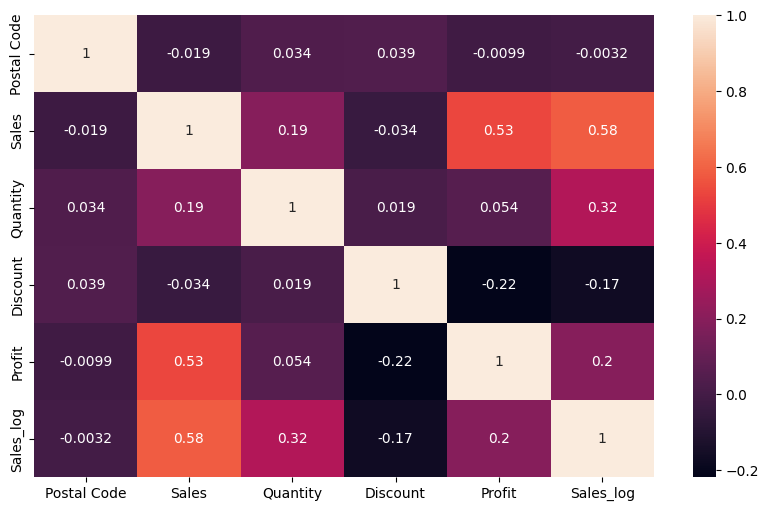

In [51]:
#Heatmap
plt.figure(figsize=(10, 6))  
sns.heatmap(corr1,annot=True)

## Embedded method:Random Forest 

In [52]:
# Feature selection using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values (by='importance', ascending=False)
top_features_rf = feature_importance_df[feature_importance_df['importance']> 0.01]['feature']

In [53]:
selected_features=list(set(top_features_rf))
selected_features  

['Discount',
 'Quantity',
 'Postal Code',
 'Sub-Category_Furnishings',
 'Profit',
 'Sub-Category_Storage',
 'Category_Office Supplies']

##### The above features selected using Random Forest Regressor are considered for further ML model buliding

In [54]:
#Reduce the dataset to selected features
X_train_selected=X_train[selected_features]
X_test_selected=X_test[selected_features]

## ML Model Building

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [56]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR(kernel='linear'),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

In [57]:
# Function to evaluate a model
def evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test):
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    return mae, mse, rmse, r2, explained_variance

In [58]:
# Evaluate each model and print the results
for name, model in models.items():
    print(f"Evaluating {name}...")
    mae, mse, rmse, r2, explained_variance = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"Explained Variance Score: {explained_variance}")
    print("-" * 40)

Evaluating Linear Regression...
Mean Absolute Error (MAE): 0.9317601216386003
Mean Squared Error (MSE): 1.5026533255167525
Root Mean Squared Error (RMSE): 1.225827608400444
R^2 Score: 0.4434131075606498
Explained Variance Score: 0.444942844759453
----------------------------------------
Evaluating Decision Tree...
Mean Absolute Error (MAE): 0.4201810081128067
Mean Squared Error (MSE): 0.47893415808031875
Root Mean Squared Error (RMSE): 0.6920506903979785
R^2 Score: 0.8226014808589932
Explained Variance Score: 0.8232707075444788
----------------------------------------
Evaluating Random Forest...
Mean Absolute Error (MAE): 0.34847794320640096
Mean Squared Error (MSE): 0.2692895237515817
Root Mean Squared Error (RMSE): 0.5189311358471196
R^2 Score: 0.9002544255243825
Explained Variance Score: 0.900257574321526
----------------------------------------
Evaluating Support Vector Machine...
Mean Absolute Error (MAE): 374.076936190479
Mean Squared Error (MSE): 255642.3464967018
Root Mean Squa

# Hyperparameter tuning

In [59]:
from sklearn.model_selection import  GridSearchCV

# RandomForestRegressor Hyperparameter Tuning

In [60]:

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10]
}

In [61]:
# Initialize the model
rf = RandomForestRegressor()

In [62]:
# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_selected, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [63]:
# Get the best model and parameters
best_rf = grid_search_rf.best_estimator_
print(f"Best parameters for RandomForestRegressor: {grid_search_rf.best_params_}")

Best parameters for RandomForestRegressor: {'max_depth': 10, 'n_estimators': 100}


# GradientBoostingRegressor Hyperparameter Tuning

In [64]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],  # Depth of individual trees
    'min_samples_split': [2, 5],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2]
}

In [65]:
# Initialize the model
gb = GradientBoostingRegressor()

In [66]:
# Perform Grid Search with Cross-Validation
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train_selected, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [67]:
# Get the best model and parameters
best_gb = grid_search_gb.best_estimator_
print(f"Best parameters for GradientBoostingRegressor: {grid_search_gb.best_params_}")

Best parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


# AdaBoostRegressor Hyperparameter Tuning

In [68]:

# Define the parameter grid
param_grid_ab = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1]
}


In [69]:
# Initialize the model
ab = AdaBoostRegressor()

In [70]:
# Perform Grid Search
grid_search_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_ab.fit(X_train_selected, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [71]:
# Get the best model and parameters
best_ab = grid_search_ab.best_estimator_
print(f"Best parameters for AdaBoostRegressor: {grid_search_ab.best_params_}")

Best parameters for AdaBoostRegressor: {'learning_rate': 0.1, 'n_estimators': 100}


# Linear Regression

In [72]:
# Define the parameter grid
param_grid_lr = {
    'fit_intercept': [True, False],  
    'positive': [True, False]
}

In [73]:
# Define the model
lr = LinearRegression()

In [74]:
# Perform Grid Search
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train_selected, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2', verbose=2)

In [75]:

# Best model and parameters
best_lr = grid_search_lr.best_estimator_
print(f"Best parameters for Linear Regression: {grid_search_lr.best_params_}")

Best parameters for Linear Regression: {'fit_intercept': True, 'positive': False}


# Decision Tree

In [76]:
# Define the parameter grid
param_grid_dt = {
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
}

In [77]:
# Define the model
dt = DecisionTreeRegressor(random_state=42)

In [78]:
# Perform Grid Search
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train_selected, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'min_samples_split': [2, 5]},
             scoring='r2', verbose=2)

In [79]:
# Get the best model and parameters
best_dt = grid_search_dt.best_estimator_
print(f"Best parameters for DecisionTreeRegressor: {grid_search_dt.best_params_}")

Best parameters for DecisionTreeRegressor: {'max_depth': 10, 'min_samples_split': 5}


## Evaluation of Best model

In [80]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)

    print("-" * 50)
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")
    print(f"Explained Variance Score: {explained_variance}")
    print("-" * 50)


In [81]:
best_models = {
    'RandomForestRegressor': best_rf,
    'GradientBoostingRegressor': best_gb,
    'AdaBoostRegressor': best_ab,
    'LinearRegression': best_lr,
    'DecisionTreeRegressor': best_dt
}

In [82]:
# Evaluate each model
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_test_selected, y_test)

Evaluating RandomForestRegressor...
--------------------------------------------------
Mean Absolute Error (MAE): 0.3570663345573689
Mean Squared Error (MSE): 0.2725812350579776
Root Mean Squared Error (RMSE): 0.5220931287212824
R^2 Score: 0.8990351666735732
Explained Variance Score: 0.8990362055218817
--------------------------------------------------
Evaluating GradientBoostingRegressor...
--------------------------------------------------
Mean Absolute Error (MAE): 0.34077520145730816
Mean Squared Error (MSE): 0.24890765970075482
Root Mean Squared Error (RMSE): 0.498906463879508
R^2 Score: 0.9078039235899259
Explained Variance Score: 0.9078288297910264
--------------------------------------------------
Evaluating AdaBoostRegressor...
--------------------------------------------------
Mean Absolute Error (MAE): 0.619550081088878
Mean Squared Error (MSE): 0.6191154322764736
Root Mean Squared Error (RMSE): 0.7868388858441565
R^2 Score: 0.7706779543488484
Explained Variance Score: 0.776

# Analysis of model performance

##### The GradientBoostingRegressor appears to be the best model based on the provided metrics, as it has the lowest MAE, MSE, and RMSE, along with the highest R^2 score.
##### The RandomForestRegressor is a close second and could be a good choice.
##### Models like LinearRegression and AdaBoostRegressor are not as effective in this scenario and are not be suitable for this particular prediction task.

In [83]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score


In [84]:
# Define the models
models = {
    'RandomForestRegressor': RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, random_state=42)
}

In [85]:
# Define the scoring function (Mean Squared Error)
scoring = make_scorer(mean_squared_error, greater_is_better=False)


In [86]:
# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    # Calculate the mean and standard deviation of the cross-validation scores
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    # Convert negative MSE back to positive for readability
    mean_score = -mean_score
    print(f"{name} Cross-Validation:")
    print(f"Mean MSE: {mean_score:.4f}")
    print(f"Standard Deviation of MSE: {std_dev:.4f}")
    print("\n")

    

RandomForestRegressor Cross-Validation:
Mean MSE: 0.2351
Standard Deviation of MSE: 0.0216


GradientBoostingRegressor Cross-Validation:
Mean MSE: 0.2322
Standard Deviation of MSE: 0.0178




##### Both models are performing well with low and consistent MSE values.
##### The GradientBoostingRegressor has a slight edge over the RandomForestRegressor due to its marginally lower mean MSE and smaller standard deviation, indicating better and more reliable performance across different subsets of the data.

In [87]:
rf = GradientBoostingRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)
score = rf.score(X_test_selected, y_test)
print(f"Testing score:{score}")
train_score = rf.score(X_train_selected, y_train)
print(f"Training score: {train_score}")
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train_selected, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Testing score:0.9047005115970231
Training score: 0.9134830713501071
Cross-validation scores: [0.89441989 0.88815835 0.90632465 0.88622929 0.87804405]
Mean cross-validation score: 0.8906352459528447


#### Consistency:
The close values between the training score (0.9135) and testing score (0.9049) suggest that the model generalizes well and is not overfitted to the training data.

#### Generalization:
The cross-validation mean score (0.8906) being slightly lower than the testing score is normal, as cross-validation typically gives a more conservative estimate of model performance. The relatively small spread in the cross-validation scores also suggests that the model is stable and performs consistently across different subsets of the data.

#### Conclusion:
The model is performing well overall, with strong training, testing, and cross-validation scores. The slight difference between these scores indicates that the model is well-tuned and likely to perform well on new, unseen data.

### Model Development

In [88]:
import joblib

In [89]:
# Assuming `best_model` is your trained GradientBoostingRegressor
best_model = grid_search_gb.best_estimator_

In [90]:
# Save the model to a file
joblib.dump(best_model, 'best_gradient_boosting_regressor.joblib')
print("Model saved successfully!")

Model saved successfully!


In [91]:
# Load the model from the file
best_model = joblib.load('best_gradient_boosting_regressor.joblib')

#### Testing with unseen data

In [99]:
best_model.fit(X_train_selected, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [100]:
# unseen data with selected features
unseen_data_array = [
    [1, 0, 10, 0.1, 12345, 50, 0]  # Example row of unseen data
]

In [104]:
# Convert the NumPy array to a DataFrame with the same feature names used in training
unseen_data_df = pd.DataFrame(unseen_data_array, columns=[
 'Discount',
 'Quantity',
 'Postal Code',
 'Sub-Category_Furnishings',
 'Profit',
 'Sub-Category_Storage',
 'Category_Office Supplies'
])

In [105]:
# Make predictions using the unseen data
predictions = best_model.predict(unseen_data_df)

In [106]:
predictions

array([8.59549733])

### Limitations of model:

1.Training can take a long time and require significant computational resources. This can be a problem in scenarios where quick model iteration or deployment is needed.

2.Gradient Boosting models have many hyperparameters.Poorly tuned hyperparameters can lead to suboptimal performance. Finding the optimal hyperparameters often requires extensive cross-validation and experimentation.

3.The model might produce unreliable predictions for data points that fall outside the range of the training data.

### Future Work:

#### 1. Model Optimization and Refinement:
Hyperparameter Tuning: Further fine-tune the hyperparameters using more advanced techniques like Bayesian Optimization or Genetic Algorithms to potentially improve model performance.

Regularization: Implement regularization techniques to reduce overfitting and improve the model's generalization to unseen data.

Feature Engineering: Explore advanced feature engineering techniques to improve the quality of input features, such as polynomial features, interaction terms, or domain-specific transformations.

#### 2. Deployment and Real-World Application:
Production Deployment: Deploy the model in a real-world environment, such as integrating it into a web application, business process, or automated system.

Real-Time Predictions: Adapt the model to perform real-time predictions, possibly by optimizing the model's speed and efficiency.

Monitoring and Maintenance: Set up monitoring systems to track the model's performance over time, detecting any performance degradation and retraining the model as necessary.

### 3. Exploring New Algorithms and Techniques:
Alternative Algorithms: Compare the Gradient Boosting model with newer or alternative algorithms like XGBoost, LightGBM, or CatBoost to see if these algorithms offer better performance or efficiency.

AutoML: Implement Automated Machine Learning (AutoML) tools to automatically explore various models, hyperparameters, and data preprocessing steps, potentially discovering configurations you hadn't considered.